In [108]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Data Preprocessing

load each dataset https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022 

In [109]:
data_dir =  os.path.join(os.getcwd(), '..', 'data')

variant = "base"

df = pd.read_csv(os.path.join(data_dir, f"{variant}.csv"))
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


drop device_fraud_count because it is always 0

In [110]:
df = df.drop(['device_fraud_count'], axis=1)

Turn categoricial data from str into int

In [111]:
categorical_fileds = ["payment_type", "employment_status", "housing_status", "source", "device_os"]
categorical_mappings = []
for field in categorical_fileds:
    unique_values = df[field].unique()
    data_maping = {}

    for i in range(len(unique_values)):
        data_maping[unique_values[i]] = i
    
    df[field] = df[field].map(data_maping)
    categorical_mappings.append(data_maping)

Scale all features that are not boolean or categorical

In [112]:
bool_fields = []

for col in df.columns:
    if df[col].nunique() == 2:
        bool_fields.append(col)
    print(f"{col}:" ,df[col].nunique())

fraud_bool: 2
income: 9
name_email_similarity: 998861
prev_address_months_count: 374
current_address_months_count: 423
customer_age: 9
days_since_request: 989330
intended_balcon_amount: 994971
payment_type: 5
zip_count_4w: 6306
velocity_6h: 998687
velocity_24h: 998940
velocity_4w: 998318
bank_branch_count_8w: 2326
date_of_birth_distinct_emails_4w: 40
employment_status: 7
credit_risk_score: 551
email_is_free: 2
housing_status: 7
phone_home_valid: 2
phone_mobile_valid: 2
bank_months_count: 33
has_other_cards: 2
proposed_credit_limit: 12
foreign_request: 2
source: 2
session_length_in_minutes: 994887
device_os: 5
keep_alive_session: 2
device_distinct_emails_8w: 4
month: 8


In [113]:
pre_scaled = ["income","customer_age" "payment_type", "employment_status", "housing_status", "source", "device_os", "month"]
pre_scaled.extend(bool_fields)

In [114]:
for col in df.columns:
    if col not in pre_scaled:
        df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

In [115]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
count,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,...,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1000000.000000
mean,0.011029,0.562696,-1.801208e-16,-5.044853e-18,-5.121592e-17,2.421885e-16,6.065548e-17,-1.108873e-16,1.090541e-16,-1.125500e-17,...,3.790035e-17,0.222988,3.744560e-17,0.025242,0.007048,8.549250e-17,1.106728,0.576947,-5.813128e-16,3.288674
std,0.104438,0.290343,1.000001e+00,1.000000e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000000e+00,1.000001e+00,...,1.000000e+00,0.416251,1.000001e+00,0.156859,0.083656,1.000001e+00,1.047938,0.494044,1.000000e+00,2.209994
min,0.000000,0.100000,-1.707543e+00,-4.022723e-01,-9.907395e-01,-1.969856e+00,-1.905866e-01,-1.195487e+00,-1.441612e+00,-1.563291e+00,...,-9.770926e-01,0.000000,-6.683305e-01,0.000000,0.000000,-1.063716e+00,0.000000,0.000000,-1.116562e+01,0.000000
25%,0.000000,0.300000,-9.285883e-01,-4.022723e-01,-7.645119e-01,-1.138310e+00,-1.892501e-01,-4.864062e-01,-1.441612e+00,-6.750642e-01,...,-9.770926e-01,0.000000,-6.478202e-01,0.000000,0.000000,-5.529479e-01,0.000000,0.000000,-1.013048e-01,1.000000
50%,0.000000,0.600000,-5.331844e-03,-4.022723e-01,-3.912365e-01,-3.067640e-01,-1.877668e-01,-4.690619e-01,3.411118e-01,-3.080366e-01,...,-4.819152e-01,0.000000,-6.478202e-01,0.000000,0.000000,-3.025754e-01,1.000000,1.000000,-1.013048e-01,3.000000
75%,0.000000,0.800000,9.057450e-01,-1.071277e-01,4.910511e-01,5.247820e-01,-1.856941e-01,-1.817205e-01,1.232474e+00,3.693232e-01,...,1.168676e+00,0.000000,-3.251091e-02,0.000000,0.000000,1.644683e-01,2.000000,1.000000,-1.013048e-01,5.000000
max,1.000000,0.900000,1.751166e+00,8.315845e+00,3.861842e+00,4.682512e+00,1.438752e+01,5.153918e+00,2.123836e+00,5.099901e+00,...,1.746383e+00,1.000000,3.249139e+00,1.000000,1.000000,9.753916e+00,4.000000,1.000000,5.430851e+00,7.000000


# Sampling

In [116]:
df_fraud = df[df['fraud_bool'] == 1]
df_not_fraud = df[df['fraud_bool'] == 0]

print(f"Fraud: {len(df_fraud)}")
print(f"Not Fraud: {len(df_not_fraud)}")

Fraud: 11029
Not Fraud: 988971


In [117]:
sampled_df = pd.concat([df_fraud, df_not_fraud.sample(n=len(df_fraud))])
sampled_df = sampled_df.sample(frac=1).reset_index(drop=True)
print(f"Sampled: {len(sampled_df)}")

Sampled: 22058


In [118]:
N_PCA = 10

pca = PCA(n_components=N_PCA)
X_pca = pca.fit_transform(sampled_df)

In [119]:
pca_samples = pd.DataFrame(X_pca)
pca_samples["fraud_bool"] = sampled_df["fraud_bool"]

# Create Models

In [120]:
X = pca_samples.drop(['fraud_bool'], axis=1)
Y = pca_samples['fraud_bool']

# Create the KMeans model

In [121]:
from sklearn.cluster import KMeans

N_CLUSTERS = 30

kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(X)
labels = kmeans.predict(X)

In [122]:
# 2D KMeans Results
res = X.copy()
res['cluster'] = labels
res['fraud_bool'] = Y

In [123]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X, labels)
print(f"Silhouette Score for data: {silhouette}")

Silhouette Score for data: 0.12285222510528553


In [124]:
res["pred"] = 0

for cluster in range(N_CLUSTERS):
    curr_cluster = res[res['cluster'] == cluster]
    fraud_percent = curr_cluster['fraud_bool'].sum() / len(curr_cluster)
    if fraud_percent > 0.5:
        res.loc[res['cluster'] == cluster, 'pred'] = 1

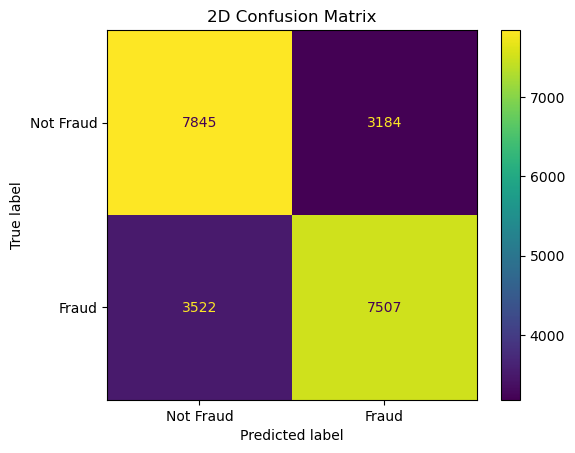

In [125]:
confusion_matrix = confusion_matrix(res['fraud_bool'], res['pred'])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Not Fraud', 'Fraud'])
disp.plot()
plt.title('2D Confusion Matrix')
plt.savefig(f"{variant}_confusion_matrix.png")
plt.show()